# Credit card fraud

The aim of this project was to build model predicting if the transaction is a fraud.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2019)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import  learning_curve, train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold,GridSearchCV,StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve,confusion_matrix,roc_auc_score,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.isnull().any().any()

False

In [5]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246949,153399.0,2.016159,-1.015916,-1.809951,-0.407078,1.494080,4.040835,-1.444851,1.004104,-0.264494,...,-0.002875,0.527688,0.111028,0.679130,0.052831,-0.356448,0.093513,-0.034238,30.00,0
125600,77729.0,1.306700,0.213456,-0.109044,-0.034889,-0.027178,-1.012244,0.394255,-0.345366,-0.181242,...,-0.456311,-1.352091,0.121974,-0.079709,0.193579,0.648696,-0.098183,0.003329,22.50,0
248082,153789.0,2.189292,-0.663296,-1.418668,-1.096806,-0.233084,-0.692229,-0.389778,-0.254238,-0.965586,...,0.493695,1.421238,0.000954,0.853217,0.223169,0.009137,-0.041107,-0.065917,15.00,0
253398,156232.0,-0.706309,0.779612,0.920347,0.997024,1.364367,-0.824400,1.570090,-0.494929,-0.919825,...,0.058125,0.332196,-0.503240,0.008304,1.115720,-0.215106,-0.143139,-0.163528,41.39,0
222876,143152.0,0.232695,0.847044,-0.308458,-0.500006,0.892295,-0.654689,0.937207,-0.307682,-0.023858,...,0.351125,1.132289,-0.291230,-0.722070,-0.301914,-0.121702,0.002894,0.092798,1.00,0


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
print('Percent of fraud transactions: {} %'.format(round(df['Class'].value_counts(normalize=True)[1]*100,2)))

Percent of fraud transactions: 0.17 %


Data set is highly imbalanced, what will demand using appropriate techniques to ensure proper model designing and validation.
Data is anonimized, the structure looks like the result of reduction technique like PCA. Only the amount and time of transaction are visible, rest of features are anonimized. 


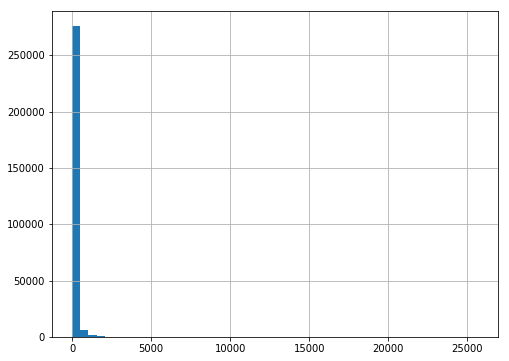

In [11]:
df['Amount'].hist(bins=50,figsize=(8,6))

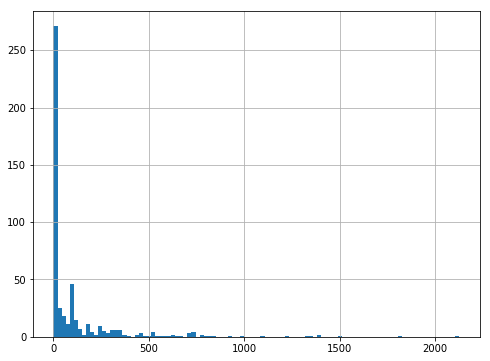

In [12]:
df[df['Class']==1]['Amount'].hist(bins=100,figsize=(8,6))

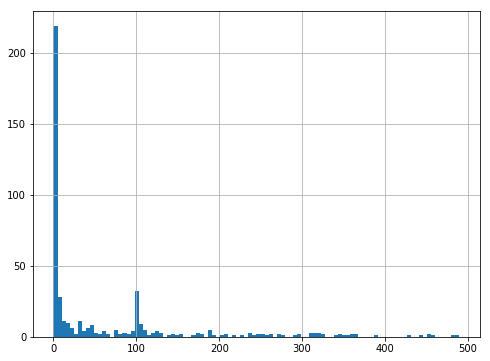

In [13]:
df[(df['Class']==1)&(df['Amount']<500)]['Amount'].hist(bins=100,figsize=(8,6))

It is visible that the fraud transactions concerncs relatively small values. 

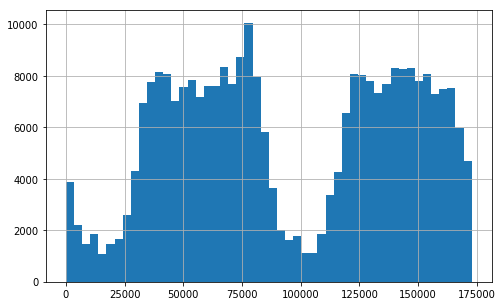

In [14]:
df['Time'].hist(bins=50,figsize=(8,5))

Taking into consideration that we have approximately 175 000 values it looks like the data concerns transactions from two days. 
Visualization shows that the number of transactions is relatively small at some time window. 

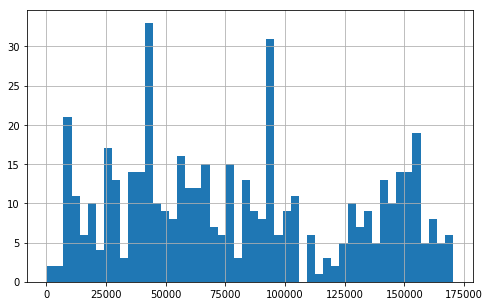

In [15]:
df[df['Class']==1]['Time'].hist(bins=50,figsize=(8,5))

We can see some peaks of the number of fraud transaction however, considering small number of fraud samples it is 
rather not important

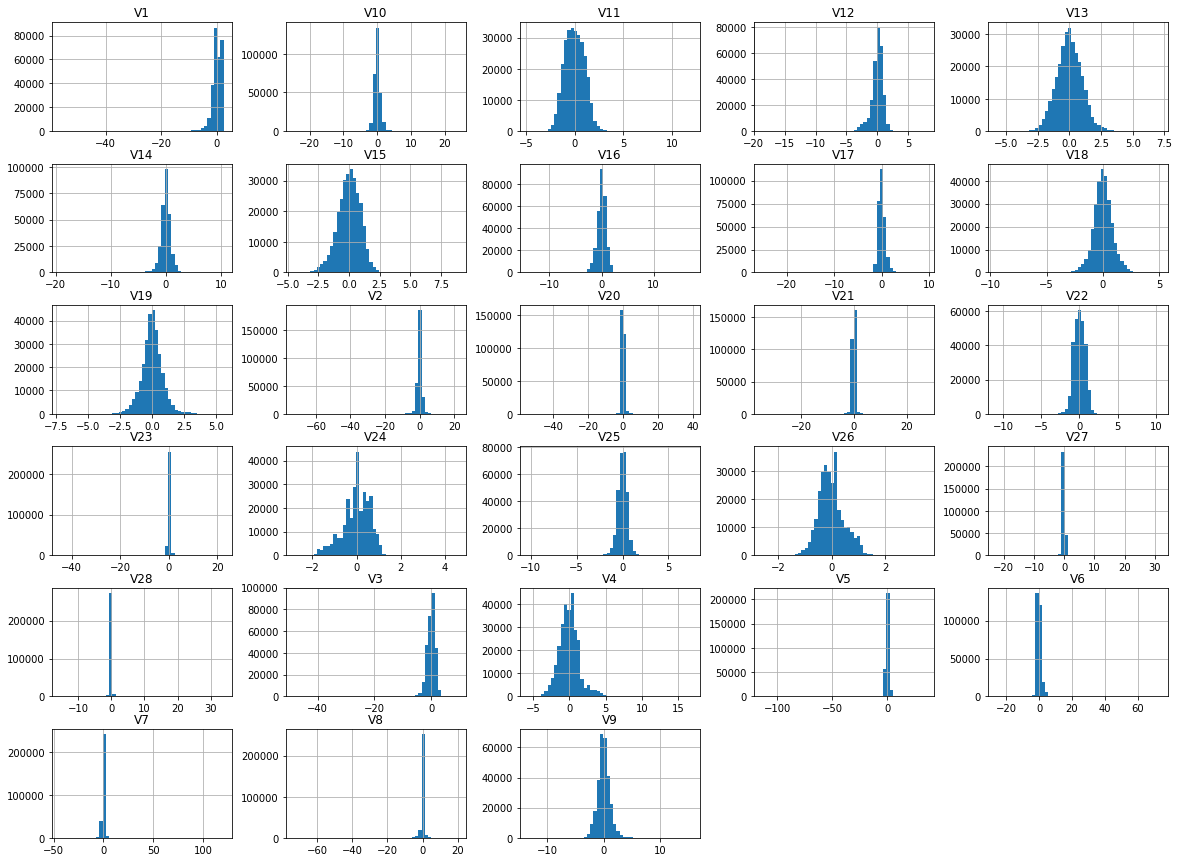

In [16]:
c=[x for x in df.columns if x not in ['Amount','Class','Time']]
df[c].hist(bins=50,figsize=(20,15))
plt.show()

After initial data analysis I've started buliding some models to check behaviour on data without modification.

In [17]:
X = df.loc[:,df.columns!='Class'].values 
y = df['Class'].values

In [18]:
def train_and_predict(model, X, y, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=2018)    
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test) 
    return round(recall_score(y_test, y_pred),3), round(precision_score(y_test, y_pred),3), round(f1_score(y_test, y_pred),3)

#### Full data set

In [19]:
models=[DummyClassifier(random_state=2019),
        LogisticRegression(solver='lbfgs',random_state=2019),
        DecisionTreeClassifier(random_state=2019),
        RandomForestClassifier(random_state=2019),
        LinearSVC(random_state=2019)]
for m in models:
    print(type(m).__name__,' (recall,precision,f1) ',train_and_predict(m, X, y, test_size=0.3))

DummyClassifier  (recall,precision,f1)  (0.0, 0.0, 0.0)
LogisticRegression  (recall,precision,f1)  (0.608, 0.798, 0.69)
DecisionTreeClassifier  (recall,precision,f1)  (0.741, 0.752, 0.746)
RandomForestClassifier  (recall,precision,f1)  (0.734, 0.946, 0.827)
LinearSVC  (recall,precision,f1)  (0.119, 0.607, 0.199)


#### Full data set with balanced weight

In [20]:
models=[LogisticRegression(class_weight='balanced',solver='lbfgs',random_state=2019),
        RandomForestClassifier(class_weight='balanced_subsample',random_state=2019),
        DecisionTreeClassifier(class_weight='balanced',random_state=2019)]
for m in models:
    print(type(m).__name__,' (recall,precision,f1) ',train_and_predict(m, X, y, test_size=0.3))

LogisticRegression  (recall,precision,f1)  (0.881, 0.034, 0.065)
RandomForestClassifier  (recall,precision,f1)  (0.713, 0.971, 0.823)
DecisionTreeClassifier  (recall,precision,f1)  (0.706, 0.732, 0.719)


Model RandomForestClassifier achieved better performance on full dataset than others. 
Using balanced class weight results in much higher recall in logistic regression, however model has completely lost precision, 
it predicts a lot of false positive values. The results of RandomForestClassifier are quiet optimistic, however it should be check more precisely to avoid overfitting.

#### Feature engineering and spliting data

Amount of transaction has been standardized, there are also added some other features.

In [21]:
def feature_eng(df):
    df['Amount_std'] = StandardScaler().fit_transform(df['Amount'].reshape(-1, 1))
    df['Amount_small']=df['Amount'].apply(lambda x: 1 if x<300 else 0)
    df['Day']=df['Time'].apply(lambda x: 1 if x<=86400 else 2)
    df['Day_time']=df['Time'].apply(lambda x: x if x<=86400 else x-86400)
    return df

df=feature_eng(df)
print(df.shape)

(284807, 35)


I have splited data into train and test sample. Train will be used in cross validation, test only in final validation of models. Splitting is based on Class  feature to ensure that there will be the same proportions of fraud and not fraud data. 

In [22]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=2019)
for train_index, test_index in split.split(df,df[['Class']]):
    train=df.loc[train_index]
    test=df.loc[test_index]
    
train=train.reset_index()
test=test.reset_index()

In [23]:
print('Percent of fraud transactions in full data set: {}%'.format(round(df['Class'].value_counts(normalize=True)[1]*100,2)))
print('Percent of fraud transactions in train data set: {}%'.format(round(train['Class'].value_counts(normalize=True)[1]*100,2)))
print('Percent of fraud transactions in test data set: {}%'.format(round(test['Class'].value_counts(normalize=True)[1]*100,2)))

Percent of fraud transactions in full data set: 0.17%
Percent of fraud transactions in train data set: 0.17%
Percent of fraud transactions in test data set: 0.17%


Functions used to perform model validation:

In [24]:
def my_cv (m, x, y):
    cv = StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)    
    scores_r = []
    scores_p = []
    
    for train_idx, test_idx in cv.split(x,y):       
        model=clone(m)
        model.fit(x.loc[train_idx], y[train_idx])
        y_pred = model.predict (x.loc[test_idx])        
        score1 = recall_score(y[test_idx], y_pred)
        score2 = precision_score(y[test_idx], y_pred)
        scores_r.append(score1)
        scores_p.append(score2)      
    return (round(np.mean(scores_r),3), round(np.std(scores_r),3)), (round(np.mean(scores_p),3), round(np.std(scores_p),3))

In [32]:
def validation(model,df=None,Xa=None,ya=None,matrix=True):
    if df is not None:
        X = df.loc[:,features].values 
        y = df['Class'].values
    else:
        X=Xa
        y=ya
        
    #uses test data frame to validate   
    X_test = test.loc[:,features].values
    y_test = test['Class'].values
    
    print(type(model).__name__)
    model.fit(X,y)
    y_pred=model.predict(X_test)

    if matrix==True:
        print('confusion matrix','\n',confusion_matrix(y_test,y_pred))    
        
    rec=np.round(recall_score(y_test,y_pred),3)
    prec=np.round(precision_score(y_test,y_pred),3)
    f1=np.round(f1_score(y_test,y_pred),3)
    return rec,prec,f1   

In [26]:
black_list=['Class','Time','Amount']
features=[x for x in df.columns if x not in black_list ]
X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

models=[LogisticRegression(solver='lbfgs',random_state=2019),
        RandomForestClassifier(random_state=2019),
        DecisionTreeClassifier(random_state=2019)]
for m in models:
    print(type(m).__name__,'(recall) (precision)',my_cv(m,X_cv,y_cv))

LogisticRegression (recall) (precision) ((0.604, 0.073), (0.813, 0.046))
RandomForestClassifier (recall) (precision) ((0.744, 0.035), (0.918, 0.026))
DecisionTreeClassifier (recall) (precision) ((0.761, 0.041), (0.734, 0.058))


RandomForestClassifier achieved better results than other models. 
Let's look at learnig curves. As success metric I've choosen f1 to ensure good compromise between precision and recall.

In [27]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes,scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")
    return plt

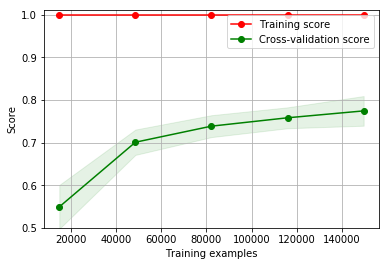

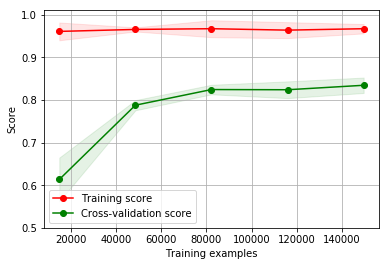

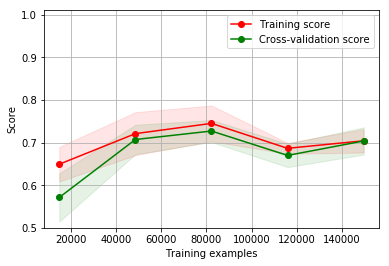

In [28]:
cv=StratifiedKFold(n_splits=4, random_state=2018, shuffle=True)
for m in [DecisionTreeClassifier(random_state=2019),
          RandomForestClassifier(random_state=2019),
          LogisticRegression(solver='lbfgs',random_state=2019)]:
    plot_learning_curve(m, X_cv, y_cv, ylim=(0.5, 1.01), cv=cv)

Learning curves shows that models using RandomForestClassifier and DecisionTreeClassifier are extremely overfitted. 
Only LogisticRegression looks correct. In case of other models some regularization should be added like for example changing
parameters or getting more data. 
Basic hyperparameter tuning using GridSearchCV has been performed.

In [31]:
param_grid = [{'n_estimators': [90,100,110,120], 'max_depth': [3,5,7,9],}]
forest_reg = RandomForestClassifier(random_state=2019)
grid_searchf = GridSearchCV(forest_reg, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_searchf.fit(X_cv,y_cv) 
print('rf f1: {}'.format(grid_searchf.best_score_))
print('rf best: {}'.format(grid_searchf.best_params_))

lasy rmse: 0.8298029099437811
lasy blad: {'max_depth': 7, 'n_estimators': 120}


In [57]:
param_grid = [{'C': [0.1,0.01,0.3,0.7,1]}]
lr = LogisticRegression(random_state=2019)
grid_search_lr = GridSearchCV(lr, param_grid, cv=4, scoring='f1', return_train_score=True)
grid_search_lr.fit(X_cv,y_cv) 
print('lr f1: {}'.format(grid_search_lr.best_score_))
print('lr best: {}'.format(grid_search_lr.best_params_))

lr f1: 0.7327658991948045
lr best: {'C': 0.1}


In [29]:
param_grid = [{'min_samples_split': [2,4,6], 'max_depth': [8,10,12],}]
tree_reg = DecisionTreeClassifier(random_state=2019)
grid_searcht = GridSearchCV(tree_reg, param_grid, cv=4, scoring='f1', return_train_score=True)
grid_searcht.fit(X_cv,y_cv) 
print('tree f1: {}'.format(grid_searcht.best_score_))
print('tree best: {}'.format(grid_searcht.best_params_))

tree f1: 0.8169565084411117
tree best: {'max_depth': 8, 'min_samples_split': 2}


I've decided to consider only few parameters and check if it would have impact on overfitting. Results below shows that 
hyperparameter tuning has helped and models are less overfitted. Nevertheless curves still are not optimal.

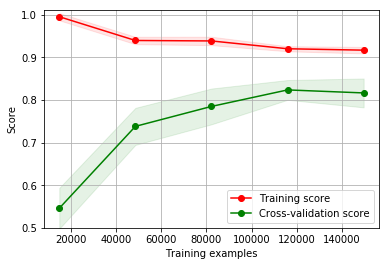

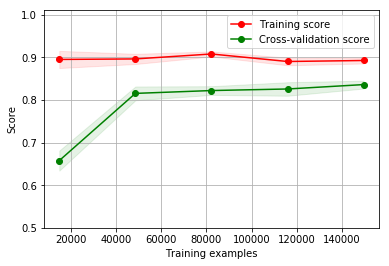

In [30]:
cv=StratifiedKFold(n_splits=4, random_state=2018, shuffle=True)
for m in [DecisionTreeClassifier(max_depth=8,min_samples_split=2, random_state=2019),
          RandomForestClassifier(max_depth=7,n_estimators=120,random_state=2019),]:
    plot_learning_curve(m, X_cv, y_cv, ylim=(0.5, 1.01), cv=cv)

Let's run cv again on models with tuned parameters:

In [31]:
models=[DecisionTreeClassifier(max_depth=8,min_samples_split=2, random_state=2019),
        RandomForestClassifier(max_depth=7,n_estimators=120,random_state=2019),
        LogisticRegression(solver='lbfgs',C=0.1,random_state=2019)]

In [33]:
for m in models:
    print(type(m).__name__,'(recall, precision)',my_cv(m,X_cv,y_cv),)

DecisionTreeClassifier (recall, precision) ((0.756, 0.052), (0.85, 0.046))
RandomForestClassifier (recall, precision) ((0.75, 0.024), (0.915, 0.02))
LogisticRegression (recall, precision) ((0.604, 0.077), (0.833, 0.034))


Validation on test data set:

In [34]:
for m in models:
    print('(rec,prec,f1)',validation(m,train),'\n')

DecisionTreeClassifier
confusion matrix 
 [[85280    15]
 [   32   116]]
(rec,prec,f1) (0.784, 0.885, 0.832)
RandomForestClassifier
confusion matrix 
 [[85289     6]
 [   34   114]]
(rec,prec,f1) (0.77, 0.95, 0.851)
LogisticRegression
confusion matrix 
 [[85272    23]
 [   49    99]]
(rec,prec,f1) (0.669, 0.811, 0.733)


Results are even better than in cross validation. 
RandomForestClassifier achieved better results than other models, but we should remember about problem of overfitting.

#### Precision recall curves

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.axis([0, 1, 0, 1])

RandomForestClassifier


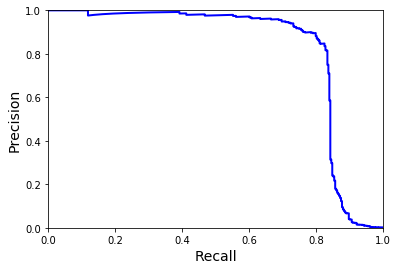

LogisticRegression


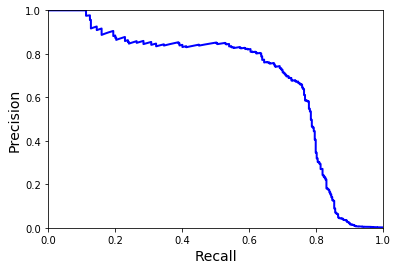

In [36]:
models =[RandomForestClassifier(max_depth=7,n_estimators=120,random_state=2019),
         LogisticRegression(solver='lbfgs',C=0.1,random_state=2019)]
for m in models:
    y_predict=cross_val_predict(m,X_cv, y_cv,cv=4,method='predict_proba')
    y_pred=y_predict[:,-1]
    precisions, recalls,thresholds = precision_recall_curve(y_cv,y_pred)  
    plt.figure(figsize=(6, 4))
    print(type(m).__name__)
    plot_precision_vs_recall(precisions, recalls)
    plt.show()

The curves shows that in both cases we can achieve about 80% recall without losing precision. If we want more it is necessary to choose between one of this scores. There is also possibility to manipulate on threshold which is used by algorithm to make decision about fraud. Let's look on curves presenting dependancy between precision recall and threshold

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=12)
    plt.legend(loc="down right", fontsize=10)
    #plt.ylim([0.4, 1])

In [38]:
models=[DecisionTreeClassifier(max_depth=8,min_samples_split=2, random_state=2019),
        RandomForestClassifier(max_depth=7,n_estimators=120,random_state=2019),
        LogisticRegression(solver='lbfgs',C=0.1,random_state=2019)]

DecisionTreeClassifier


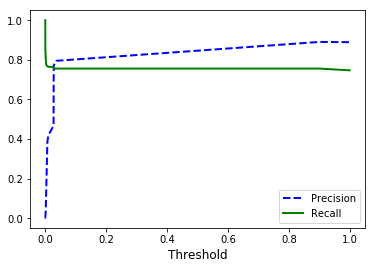

RandomForestClassifier


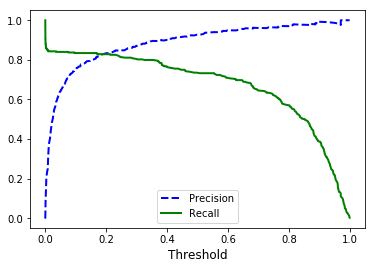

LogisticRegression


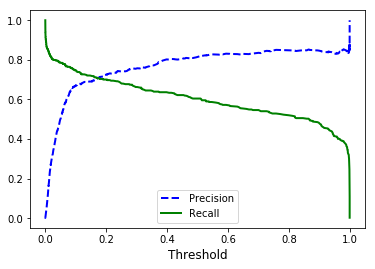

In [39]:
for m in models:
    y_predict=cross_val_predict(m,X_cv, y_cv,cv=4,method='predict_proba')
    y_pred=y_predict[:,-1]
    precisions, recalls, thresholds = precision_recall_curve(y_cv,y_pred)  
    plt.figure(figsize=(6, 4))
    print(type(m).__name__)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()

According to curves limiting threshold could result in higher recall with very small decrease of precision. 

####  ROC curve

In [40]:
def plot_roc_curve(fpr, tpr, label=None):  
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False positive rate', fontsize=13)
    plt.ylabel('True positive rate', fontsize=13)

DecisionTreeClassifier
roc auc score: 86.76%


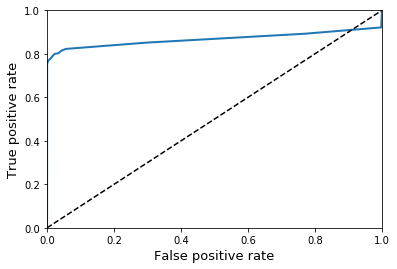

RandomForestClassifier
roc auc score: 96.7%


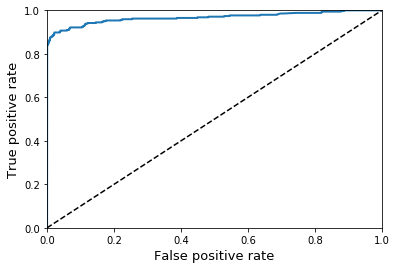

LogisticRegression
roc auc score: 95.74%


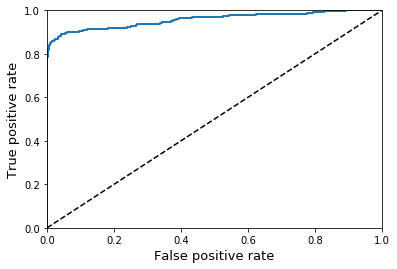

In [41]:
for m in models:
    y_predict=cross_val_predict(m,X_cv, y_cv,cv=4,method='predict_proba')
    y_pred=y_predict[:,-1]
    fpr, tpr, thresholds = roc_curve(y_cv,y_pred) 
    plt.figure(figsize=(6, 4))
    print(type(m).__name__)
    print('roc auc score: {}%' .format(round(roc_auc_score(y_cv,y_pred)*100,2)))
    plot_roc_curve(fpr, tpr)
    plt.show()

Roc curves looks pretty well, however when data is highly imbalanced, the results of this feature might be misleading. It is reasonable not to pay to much attention to this feature, due to many true negative (non-fraud transactions).

### Undersampling

One of method which may be used working with imbalanced data is undersampling. In this part I will perfrom random undersampling to ensure that data set will contain same proportions of fraud and non-fraud data. 

In [42]:
number_fraud=len(train[train['Class']==1])
number_normal=len(train[train['Class']==0])

fraud_idx=np.array(train[train['Class']==1].index)
normal_idx=train[train['Class']==0].index
np.random.seed(2019)
normal_idx_random=np.array(np.random.choice(normal_idx,number_fraud,replace=False))

und_idx=np.concatenate([fraud_idx,normal_idx_random])
np.random.shuffle(und_idx)

und_df=train.iloc[und_idx,:]
print('Percent of fraud transactions in undersampled set: {}%'.format(round(und_df['Class'].value_counts(normalize=True)[1]*100,2)))
print('Percent of non fraud transactions in undersampled set: {}%'.format(round(und_df['Class'].value_counts(normalize=True)[0]*100,2)))

print('Number of fraud transactions in undersampled set: {}'.format(und_df['Class'].value_counts(normalize=False)[1]))
print('Number of non fraud transactions in undersampled set: {}'.format(und_df['Class'].value_counts(normalize=False)[0]))

Percent of fraud transactions in undersampled set: 50.0%
Percent of non fraud transactions in undersampled set: 50.0%
Number of fraud transactions in undersampled set: 344
Number of non fraud transactions in undersampled set: 344


In [43]:
black_list=['Class','Time','Amount']
features=[x for x in und_df.columns if x not in black_list ]
X = und_df.loc[:,features].values 
y = und_df['Class'].values

models=[LogisticRegression(solver='lbfgs',random_state=2019),
        RandomForestClassifier(random_state=2019),
        DecisionTreeClassifier(random_state=2019)]

for m in models:
    print(type(m).__name__,' (recall,precision,f1) ',train_and_predict(m, X, y, test_size=0.33))

LogisticRegression  (recall,precision,f1)  (0.856, 0.941, 0.896)
RandomForestClassifier  (recall,precision,f1)  (0.892, 0.971, 0.93)
DecisionTreeClassifier  (recall,precision,f1)  (0.883, 0.899, 0.891)


The results looks very optimistic however taking into consideration that the set of data is very small there 
is a risk of overfitting.
In order to perform proper cross validation I've prepared function in which  undersampling is performing after 
splitting data into train and test. 

In [44]:
def undersampling(xc,yc):
    np.random.seed(2019)
    number_fraud=len(xc[yc==1])
    number_normal=len(xc[yc==0])
    
    fraud_idx=np.array(xc[yc==1].index)
    normal_idx=xc[yc==0].index    
    normal_idx_random=np.array(np.random.choice(normal_idx,number_fraud,replace=False))
    und_idx=np.concatenate([fraud_idx,normal_idx_random])
    np.random.shuffle(und_idx)  
    
    return xc.loc[und_idx], yc[und_idx]

In [45]:
def cv_undersampling (m, xc, yc):
    cv = StratifiedKFold(n_splits=4, random_state=2018, shuffle=True)    
    scores_r = []
    scores_p = []
    
    for train_idx, test_idx in cv.split(xc,yc):      
        x=xc.loc[train_idx]
        y=yc.loc[train_idx]
        xt=xc.loc[test_idx]
        yt=yc.loc[test_idx]
        
        x,y=undersampling(x,y)      
        model=clone(m)
        model.fit(x, y)
        y_pred = model.predict(xt)
        
        score1 = recall_score(yt, y_pred)
        score2 = precision_score(yt, y_pred)    
        scores_r.append(score1)
        scores_p.append(score2)    
        
    return (round(np.mean(scores_r),3), round(np.std(scores_r),3)),(round(np.mean(scores_p),3), round(np.std(scores_p),3))

Basic hyperparameter optimalization has been also performed to fit parameters to models using undersampled data.

In [47]:
X_cv, y_cv=undersampling(train.loc[:,features],train['Class'])
param_grid = [{ 'max_depth': [3,5,7,9,11,15,6],'min_samples_split': [2,4,6,8],}]
dt_reg = DecisionTreeClassifier(random_state=2019)
grid_search_dt = GridSearchCV(dt_reg, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search_dt.fit(X_cv,y_cv) 
print('dt f1: {}'.format(grid_search_dt.best_score_))
print('dt best: {}'.format(grid_search_dt.best_params_))

dt f1: 0.9094837703188611
dt best: {'max_depth': 6, 'min_samples_split': 2}


In [48]:
X_cv, y_cv=undersampling(train.loc[:,features],train['Class'])
param_grid = [{'n_estimators': [90,100,110,120,130], 'max_depth': [3,5,7,9,11,15],}]
forest_reg = RandomForestClassifier(random_state=2019)
grid_searchf = GridSearchCV(forest_reg, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_searchf.fit(X_cv,y_cv) 
print('rf f1: {}'.format(grid_searchf.best_score_))
print('rf best: {}'.format(grid_searchf.best_params_))

rf f1: 0.9349805509036163
rf best: {'max_depth': 5, 'n_estimators': 90}


In [46]:
X_cv, y_cv=undersampling(train.loc[:,features],train['Class'])
param_grid = [{'C': [0.1,0.08,0.3,0.7,1,0.5,10]}]
lr = LogisticRegression(random_state=2019)
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search_lr.fit(X_cv,y_cv) 
print('lr f1: {}'.format(grid_search_lr.best_score_))
print('lr best: {}'.format(grid_search_lr.best_params_))

lr f1: 0.9251533046993438
lr best: {'C': 0.7}


In [49]:
black_list=['Class','Time','Amount']
features=[x for x in df.columns if x not in black_list ]
X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

for m in [DecisionTreeClassifier(max_depth=6,min_samples_split=2, random_state=2019),
          RandomForestClassifier(max_depth=5, n_estimators=90,random_state=2019),
          LogisticRegression(solver='lbfgs',C=0.7,random_state=2019)]:
    print(type(m).__name__,'(recall) (precision)',cv_undersampling(m,X_cv,y_cv),)

DecisionTreeClassifier (recall) (precision) ((0.895, 0.032), (0.023, 0.002))
RandomForestClassifier (recall) (precision) ((0.895, 0.028), (0.088, 0.015))
LogisticRegression (recall) (precision) ((0.924, 0.033), (0.035, 0.007))


The result above are more reliable. Precision is very small. It is caused by udersampling. In validation set proportions of values are different than during training. Recall is much higher than in training on full data set but models qualify many transactions as fraud when in fact they are normal. Let's check on validation data.

In [52]:
for m in [DecisionTreeClassifier(max_depth=6,min_samples_split=2, random_state=2019),
          RandomForestClassifier(max_depth=5, n_estimators=90,random_state=2019),
          LogisticRegression(solver='lbfgs',C=0.7,random_state=2019)]:
    print('(rec,prec,f1)',validation(m,und_df),'\n')

DecisionTreeClassifier
confusion matrix 
 [[78180  7115]
 [   16   132]]
(rec,prec,f1) (0.892, 0.018, 0.036) 

RandomForestClassifier
confusion matrix 
 [[84575   720]
 [   19   129]]
(rec,prec,f1) (0.872, 0.152, 0.259) 

LogisticRegression
confusion matrix 
 [[82611  2684]
 [   13   135]]
(rec,prec,f1) (0.912, 0.048, 0.091) 



Models are characterized by high recall. Unfotrtunately as it we could be expected all models have small precsion - a lot of transactions are incorectly classified as frauds. If we need high recall and loss of precision is acceptable, this approach might be worth considering.

### Oversampling - SMOTE

Smote is a technique in which new synthetic points from minority class are beeing created in order to ensure balance between classes. As a result of SMOTE transformation we get bigger data set.

In [53]:
Xs = train.loc[:,features].values 
ys = train['Class'].values

method = SMOTE(random_state=2019)
X_resampled, y_resampled = method.fit_sample(Xs, ys)

print('Number of fraud transactions in undersampled set: {}'.format(len(X_resampled[y_resampled==1])))
print('Number of non fraud transactions in undersampled set: {}'.format(len(X_resampled[y_resampled==0])))

Number of fraud transactions in undersampled set: 199020
Number of non fraud transactions in undersampled set: 199020


After oversampling with Smote, there are now 199 020 fraud transactions in dataset. It is important to remember that this data is not real so we need to be cautious.

In [54]:
def my_cv_os (m, xc, yc):
    cv = StratifiedKFold(n_splits=4, random_state=2018, shuffle=True) 
    scores_r = []
    scores_p = []
    
    for train_idx, test_idx in cv.split(xc,yc):        
        x=xc.loc[train_idx].values
        y=yc.loc[train_idx].values
        xt=xc.loc[test_idx].values
        yt=yc.loc[test_idx].values
        
        method = SMOTE(random_state=2019)
        X_resampled, y_resampled = method.fit_sample(x, y)
        model=clone(m)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(xt)        
        
        score1 = recall_score(yt, y_pred)
        score2 = precision_score(yt, y_pred)       
        scores_r.append(score1)
        scores_p.append(score2)        
    return (round(np.mean(scores_r),3), round(np.std(scores_r),3)),(round(np.mean(scores_p),3), round(np.std(scores_p),3))

In [60]:
param_grid = [{'n_estimators': [90,100,110,120], 'max_depth': [5,7,9],}]
forest_reg = RandomForestClassifier(random_state=2019)
grid_searchf = GridSearchCV(forest_reg, param_grid, cv=4, scoring='f1', return_train_score=True)
grid_searchf.fit(X_resampled,y_resampled) 
print('rf f1: {}'.format(grid_searchf.best_score_))
print('rf best: {}'.format(grid_searchf.best_params_))

rf f1: 0.9902453031614963
rf best: {'max_depth': 9, 'n_estimators': 110}


In [59]:
param_grid = [{'min_samples_split': [2,4,6], 'max_depth': [8,10,12],}]
tree_reg = DecisionTreeClassifier(random_state=2019)
grid_searcht = GridSearchCV(tree_reg, param_grid, cv=4, scoring='f1', return_train_score=True)
grid_searcht.fit(X_resampled,y_resampled) 
print('tree f1: {}'.format(grid_searcht.best_score_))
print('tree best: {}'.format(grid_searcht.best_params_))

tree f1: 0.9958615881657173
tree best: {'max_depth': 12, 'min_samples_split': 2}


In [58]:
param_grid = [{'C': [0.1,0.01,0.3,0.7,1]}]
lr = LogisticRegression(random_state=2019)
grid_search_lr = GridSearchCV(lr, param_grid, cv=4, scoring='f1', return_train_score=True)
grid_search_lr.fit(X_resampled,y_resampled) 
print('lr f1: {}'.format(grid_search_lr.best_score_))
print('lr best: {}'.format(grid_search_lr.best_params_))

lr f1: 0.9588752051776922
lr best: {'C': 0.1}


In [61]:
models=[DecisionTreeClassifier(max_depth=10,min_samples_split=2, random_state=2019),
        RandomForestClassifier(max_depth=9,n_estimators=110,random_state=2019),
        LogisticRegression(solver='lbfgs',C=0.1,random_state=2019)]

In [56]:
black_list=['Class','Time','Amount']
features=[x for x in df.columns if x not in black_list ]
X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

for m in models:
    print(type(m).__name__,' (recall,precision,f1) ',my_cv_os(m,X_cv, y_cv))

DecisionTreeClassifier  (recall,precision,f1)  ((0.843, 0.039), (0.151, 0.022))
RandomForestClassifier  (recall,precision,f1)  ((0.858, 0.034), (0.361, 0.029))
LogisticRegression  (recall,precision,f1)  ((0.898, 0.024), (0.097, 0.02))


This technique allows to achieve higher precision, but the results of recall have decreased. 

Validation

In [62]:
for m in models:
    print('(rec,prec,f1)',validation(m,None,X_resampled, y_resampled),'\n')

DecisionTreeClassifier
confusion matrix 
 [[84779   516]
 [   24   124]]
(rec,prec,f1) (0.838, 0.194, 0.315) 

RandomForestClassifier
confusion matrix 
 [[85175   120]
 [   22   126]]
(rec,prec,f1) (0.851, 0.512, 0.64) 

LogisticRegression
confusion matrix 
 [[83952  1343]
 [   19   129]]
(rec,prec,f1) (0.872, 0.088, 0.159) 



Classificators still have high recall. The number of false positive is lower than in undersampling - precision is significantly higher than (especially in case of RandomForestClassifier- increase from 15% to 50%).
Models have ommited some fraud transactions - recall is smaller than using undersampling (about 2-5% decrease).

####  <center> Summary of validation results from used approaches 

![title](img/res.png)

#### Conslusions: 
- risk of overfitting in working with imbalanced data is very high
- all techniques have some advantages and disadvantages - choice of approach should be performed very carefully and should be based on clearly precised business requirements

#### To do:
- pay more attention to hyperparameter tuning, use hyperopt or scikit optimize
- check different algorithms like SVM, XGBoost
- try to combine algorithms, for example logistic regression ang random forests
- try to remove outliers
- more feature engineering